## DL-LA Attack Using SCARR

Run the framework imports and setup the trace handlers, the engine, and engine's container

In [1]:
import asyncio
import sys
import nest_asyncio
nest_asyncio.apply()

from scarr.engines.dl_la import DL_LA as dlla

from scarr.file_handling.trace_handler import TraceHandler as th

from scarr.container.container import Container, ContainerOptions

handler1 = th(fileName='cs5_group0_even.zarr', batchSize=5000)
handler2 = th(fileName='cs5_group1_even.zarr', batchSize=5000)

# engine = dlla('MLP', train_float=0.90, num_epochs=10) # params: model_type, training_float, num_epochs
engine = dlla('MLP', train_float=0.90, num_epochs=2) # params: model_type, training_float, num_epochs
container = Container(options=ContainerOptions(engine=engine, handler=handler1, handler2=handler2), Async=True)


opened zarr file  cs5_group0_even.zarr
opened zarr file  cs5_group1_even.zarr


In [2]:
engine.run(container, model_building=True)   # params: container, train_only=False, validate_only=False 

Epoch 1/2, Average Loss: 0.25054582030842193
Epoch 2/2, Average Loss: 0.25013674188297413


TypeError: An asyncio.Future, a coroutine or an awaitable is required

In [ ]:
# engine.save_model('model.pth')   # params: path
# engine.load_model(container, 'model.pth')   # params: container, path

In [ ]:
engine.run(container, model_validation=True)   # params: container, train_only=False, validate_only=False 

<coroutine object DL_LA.run at 0x148667140>

In [ ]:
acc = engine.get_accuracy()
print(acc)

0


Get the sensitivity analysis values and print to chart

In [ ]:
sens = engine.get_sensitivity()

AttributeError: 'NoneType' object has no attribute 'numpy'

Scarr Plot of DL-LA Sensitivity


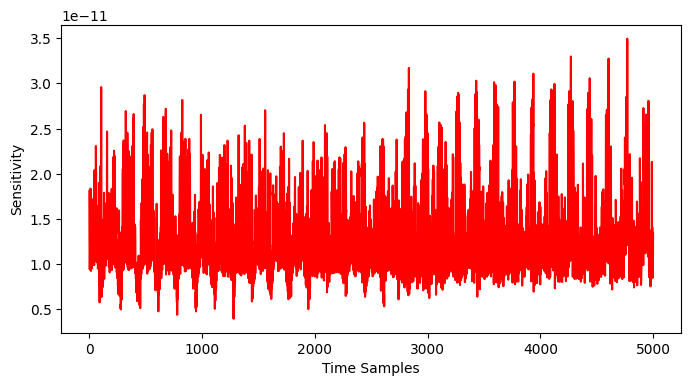

In [ ]:
import matplotlib.pyplot as plt

print('Scarr Plot of DL-LA Sensitivity')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(sens, color='red')

ax.set_xlabel('Time Samples')
ax.set_ylabel('Sensitivity')

plt.show()